# Base de données accidents corporels de la circulation

data.gouv est une plateforme de diffusion de données publiques de l'État français lancée en 2011. <br> data.gouv.fr est développé par Etalab, une mission placée sous l'autorité du Premier ministre.<br>

Pour cet exercice nous allons utiliser quelques données tabulaires (format CSV) sur les accidents [corporels liés de la circulation](https://www.data.gouv.fr/fr/datasets/base-de-donnees-accidents-corporels-de-la-circulation/).

Voici les 3 url directes vers les CSV correspondants que nous allons exploiter.

In [32]:
url_usagers2017          = "https://static.data.gouv.fr/resources/base-de-donnees-accidents-corporels-de-la-circulation/20180927-111153/usagers-2017.csv"
url_lieux2017            = "https://static.data.gouv.fr/resources/base-de-donnees-accidents-corporels-de-la-circulation/20180927-111131/lieux-2017.csv"
url_caracteristiques2017 = "https://static.data.gouv.fr/resources/base-de-donnees-accidents-corporels-de-la-circulation/20180927-111012/caracteristiques-2017.csv"

## Ouvrir les CSV dont l'url est donnée ci-dessus

In [33]:
!curl $url_caracteristiques2017 -o "url_usagers2017.csv"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 4737k  100 4737k    0     0  4700k      0  0:00:01  0:00:01 --:--:-- 4700k


In [34]:
!head -10 url_usagers2017.csv

## Ouvrir directement avec Pandas

In [35]:
import pandas as pd

In [41]:
# solution 1
dico_urls = {
    'url_usagers2017':"https://static.data.gouv.fr/resources/base-de-donnees-accidents-corporels-de-la-circulation/20180927-111153/usagers-2017.csv",
    'url_lieux2017':"https://static.data.gouv.fr/resources/base-de-donnees-accidents-corporels-de-la-circulation/20180927-111131/lieux-2017.csv",
    'url_caracteristiques2017': "https://static.data.gouv.fr/resources/base-de-donnees-accidents-corporels-de-la-circulation/20180927-111012/caracteristiques-2017.csv"
}

In [49]:
for nom_db, url in dico_urls.items():
    variable = "".join(nom_db.split('_')[1:])
    try:
        globals()[variable] = pd.read_csv(url, sep=',', encoding='utf8')
        print( 'retrieved {} stored in {}'.format(nom_db, variable))
    except:
        try:
            globals()[variable] = pd.read_csv(url, sep=',', encoding='latin1')
            print( 'retrieved stored in {}'.format(nom_db, variable))
        except:
            pass   

retrieved url_lieux2017 stored in lieux2017
retrieved url_usagers2017 stored in usagers2017
retrieved stored in url_caracteristiques2017


## Montrer les 10 premières lignes de usagers_2017

In [50]:
usagers2017.head()

,Num_Acc,place,catu,grav,sexe,trajet,secu,locp,actp,etatp,an_nais,num_veh
0,201700000001,1.0,1,3,1,9.0,13.0,0.0,0.0,0.0,1968.0,B01
1,201700000001,2.0,2,3,2,9.0,11.0,0.0,0.0,0.0,1973.0,B01
2,201700000001,1.0,1,3,1,1.0,13.0,0.0,0.0,0.0,1967.0,A01
3,201700000002,1.0,1,1,1,0.0,11.0,0.0,0.0,0.0,1953.0,A01
4,201700000002,1.0,1,3,1,5.0,22.0,0.0,0.0,0.0,1960.0,B01


## Les 10 dernières de caractertistiques_2017

In [51]:
caracteristiques2017.tail(10)

,Num_Acc,an,mois,jour,hrmn,lum,agg,int,atm,col,com,adr,gps,lat,long,dep
60691,201700060692,17,11,7,1904,3,2,1,1.0,6.0,611,tsoundzou-Mangadzia Tso,Y,1276433.0,4522543.0,976
60692,201700060693,17,11,10,1900,3,2,1,1.0,6.0,611,"1, mgombani-Baobab ( Bd",Y,1278371.0,4523251.0,976
60693,201700060694,17,11,10,1907,3,1,9,1.0,1.0,611,"1, tsoundzou-Abdallah So",Y,1280604.0,4520865.0,976
60694,201700060695,17,11,12,820,1,2,1,1.0,1.0,611,"1, kaweni-Caserne ( rue",Y,1277549.0,4522361.0,976
60695,201700060696,17,11,14,1203,1,2,3,1.0,1.0,611,"1, tsoundzou-Maternelle",Y,1280702.0,4520721.0,976
60696,201700060697,17,11,19,1030,1,2,1,1.0,6.0,611,"1, tsoundzou-Baraka (rue",Y,1280703.0,4520703.0,976
60697,201700060698,17,11,25,624,1,1,6,1.0,7.0,611,"1, mamoudzou centre-Adri",Y,1278296.0,4523434.0,976
60698,201700060699,17,11,26,1745,2,2,1,1.0,3.0,611,"1, tsoundzou-Abdallah So",Y,1280711.0,4520617.0,976
60699,201700060700,17,11,28,1405,1,2,1,1.0,3.0,611,"1, kaweni-Kaweni nord (",Y,1276210.0,4522609.0,976
60700,201700060701,17,11,30,1939,3,2,1,1.0,6.0,611,tsoundzou-Stara (rue),Y,1281342.0,4520169.0,976


## Combien y a t'il de lignes dans catacteristiques_2017

In [59]:
caracteristiques2017.shape[0]

60701

## Combien de colonnes dans caracteristiques2017

In [60]:
caracteristiques2017.shape[1]

16

## Quel est le dtype de chaque colonne de usagers2017 et caracteristiques2017  ? 

In [145]:
caracteristiques2017.dtypes

Num_Acc      int64
an           int64
mois         int64
jour         int64
hrmn         int64
lum          int64
agg          int64
int          int64
atm        float64
col        float64
com          int64
adr         object
gps         object
lat        float64
long       float64
dep          int64
dtype: object

In [147]:
usagers2017.dtypes

Num_Acc      int64
place      float64
catu        object
grav        object
sexe        object
trajet     float64
secu       float64
locp       float64
actp       float64
etatp      float64
an_nais    float64
num_veh     object
dtype: object

## Regardez s'il existe des duplicates sur Num_Acc dans usagers_2017 et caracteristiques_2017 

In [ ]:
## aucun du côté des caractéristiques de l'accident

In [55]:
caracteristiques2017[caracteristiques2017.duplicated(subset='Num_Acc', keep=False)]

,Num_Acc,an,mois,jour,hrmn,lum,agg,int,atm,col,com,adr,gps,lat,long,dep


In [ ]:
## oui du côté des usagers, logique: il y a parfois plusieurs usagers d'un véhicule par accidents

In [54]:
usagers2017[usagers2017.duplicated(subset='Num_Acc', keep=False)]

,Num_Acc,place,catu,grav,sexe,trajet,secu,locp,actp,etatp,an_nais,num_veh
0,201700000001,1.0,1,3,1,9.0,13.0,0.0,0.0,0.0,1968.0,B01
1,201700000001,2.0,2,3,2,9.0,11.0,0.0,0.0,0.0,1973.0,B01
2,201700000001,1.0,1,3,1,1.0,13.0,0.0,0.0,0.0,1967.0,A01
3,201700000002,1.0,1,1,1,0.0,11.0,0.0,0.0,0.0,1953.0,A01
4,201700000002,1.0,1,3,1,5.0,22.0,0.0,0.0,0.0,1960.0,B01
...,...,...,...,...,...,...,...,...,...,...,...,...
136015,201700060699,1.0,1,4,1,9.0,11.0,0.0,0.0,0.0,1994.0,A01
136016,201700060699,1.0,1,1,2,9.0,11.0,0.0,0.0,0.0,1974.0,B01
136017,201700060700,1.0,1,1,2,9.0,11.0,0.0,0.0,0.0,1987.0,A01
136018,201700060700,1.0,1,4,1,9.0,21.0,0.0,0.0,0.0,1991.0,B01


## En déduire le type de relation entre catacteristiques2017 et usagers2017 ( one-to-one, one-to-many, many-to-many)

## remplacez les valeurs 1 et 2 par Homme et Femme pour le sexe de l'usager

In [57]:
usagers2017.replace({'sexe' : { 1: 'Homme', 2: 'Femme'}}, inplace=True)
usagers2017

,Num_Acc,place,catu,grav,sexe,trajet,secu,locp,actp,etatp,an_nais,num_veh
0,201700000001,1.0,1,3,Homme,9.0,13.0,0.0,0.0,0.0,1968.0,B01
1,201700000001,2.0,2,3,Femme,9.0,11.0,0.0,0.0,0.0,1973.0,B01
2,201700000001,1.0,1,3,Homme,1.0,13.0,0.0,0.0,0.0,1967.0,A01
3,201700000002,1.0,1,1,Homme,0.0,11.0,0.0,0.0,0.0,1953.0,A01
4,201700000002,1.0,1,3,Homme,5.0,22.0,0.0,0.0,0.0,1960.0,B01
...,...,...,...,...,...,...,...,...,...,...,...,...
136016,201700060699,1.0,1,1,Femme,9.0,11.0,0.0,0.0,0.0,1974.0,B01
136017,201700060700,1.0,1,1,Femme,9.0,11.0,0.0,0.0,0.0,1987.0,A01
136018,201700060700,1.0,1,4,Homme,9.0,21.0,0.0,0.0,0.0,1991.0,B01
136019,201700060700,2.0,2,4,Femme,9.0,21.0,0.0,0.0,0.0,1990.0,B01


## Trouver les usagers féminins ayant eu des accidents

In [61]:
usagers2017[usagers2017.sexe == "Femme"]

,Num_Acc,place,catu,grav,sexe,trajet,secu,locp,actp,etatp,an_nais,num_veh
1,201700000001,2.0,2,3,Femme,9.0,11.0,0.0,0.0,0.0,1973.0,B01
8,201700000003,7.0,2,1,Femme,1.0,11.0,0.0,0.0,0.0,2015.0,B01
9,201700000004,1.0,1,3,Femme,1.0,11.0,0.0,0.0,0.0,1960.0,A01
15,201700000008,1.0,1,1,Femme,0.0,11.0,0.0,0.0,0.0,1961.0,B01
18,201700000009,2.0,2,3,Femme,1.0,11.0,0.0,0.0,0.0,1964.0,A01
...,...,...,...,...,...,...,...,...,...,...,...,...
136010,201700060696,2.0,2,4,Femme,9.0,21.0,0.0,0.0,0.0,1960.0,B01
136013,201700060697,NaN,3,4,Femme,9.0,NaN,2.0,3.0,1.0,2013.0,A01
136016,201700060699,1.0,1,1,Femme,9.0,11.0,0.0,0.0,0.0,1974.0,B01
136017,201700060700,1.0,1,1,Femme,9.0,11.0,0.0,0.0,0.0,1987.0,A01


## remplacez les catégories/labels dans grav par leur description
## idem pour catu les catégories d'usagers

In [73]:
gravite = {  1: 'Indemne', 2: 'Tué', 3: 'Blessé hospitalisé', 4: 'Blessé léger'}
catu =  { 1: 'Conducteur',
          2: 'Passager',
          3: 'Piéton',
          4: 'Piéton en roller ou en trottinette'}

In [74]:
usagers2017.replace({'grav':gravite, 'catu': catu}, inplace=True)
usagers2017

,Num_Acc,place,catu,grav,sexe,trajet,secu,locp,actp,etatp,an_nais,num_veh
0,201700000001,1.0,Conducteur,Blessé hospitalisé,Homme,9.0,13.0,0.0,0.0,0.0,1968.0,B01
1,201700000001,2.0,Passager,Blessé hospitalisé,Femme,9.0,11.0,0.0,0.0,0.0,1973.0,B01
2,201700000001,1.0,Conducteur,Blessé hospitalisé,Homme,1.0,13.0,0.0,0.0,0.0,1967.0,A01
3,201700000002,1.0,Conducteur,Indemne,Homme,0.0,11.0,0.0,0.0,0.0,1953.0,A01
4,201700000002,1.0,Conducteur,Blessé hospitalisé,Homme,5.0,22.0,0.0,0.0,0.0,1960.0,B01
...,...,...,...,...,...,...,...,...,...,...,...,...
136016,201700060699,1.0,Conducteur,Indemne,Femme,9.0,11.0,0.0,0.0,0.0,1974.0,B01
136017,201700060700,1.0,Conducteur,Indemne,Femme,9.0,11.0,0.0,0.0,0.0,1987.0,A01
136018,201700060700,1.0,Conducteur,Blessé léger,Homme,9.0,21.0,0.0,0.0,0.0,1991.0,B01
136019,201700060700,2.0,Passager,Blessé léger,Femme,9.0,21.0,0.0,0.0,0.0,1990.0,B01


## Comptez le nombre de chaque cas de gravité (combien de décès, combien de Indemne, etc.)

In [65]:
usagers2017.grav.value_counts()

Indemne               56270
Blessé léger          47158
Blessé hospitalisé    28993
Tué                    3600
Name: grav, dtype: int64

## L'afficher

In [71]:
%matplotlib inline

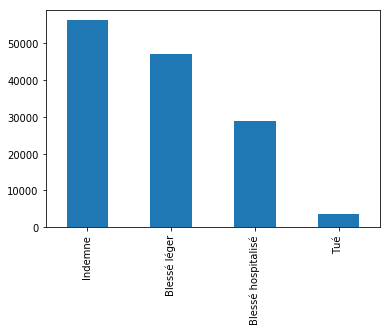

In [72]:
usagers2017.grav.value_counts().plot(kind='bar')

## Afficher de même le nombre d'accidents par différentes catégories d'usagers

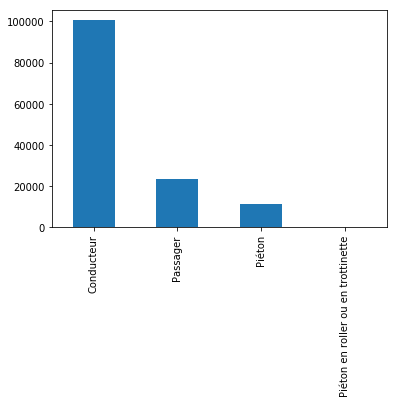

In [77]:
usagers2017.catu.value_counts().plot(kind='bar')

## Trouver les usagers féminins qui ont eu des accidents mineurs (blessés légers ou Indemne)
enregistrez la variable mask intermédiaire pour rendre le code plus clean

In [67]:
mask = (usagers2017.sexe == "Femme") & (usagers2017.grav.isin(["Blessé léger", "Indemne"]))

In [69]:
usagers2017[mask]

,Num_Acc,place,catu,grav,sexe,trajet,secu,locp,actp,etatp,an_nais,num_veh
8,201700000003,7.0,2,Indemne,Femme,1.0,11.0,0.0,0.0,0.0,2015.0,B01
15,201700000008,1.0,1,Indemne,Femme,0.0,11.0,0.0,0.0,0.0,1961.0,B01
40,201700000021,1.0,1,Indemne,Femme,1.0,11.0,0.0,0.0,0.0,1994.0,A01
41,201700000021,1.0,1,Blessé léger,Femme,1.0,11.0,0.0,0.0,0.0,1960.0,B01
44,201700000022,1.0,1,Indemne,Femme,0.0,11.0,0.0,0.0,0.0,1997.0,A01
...,...,...,...,...,...,...,...,...,...,...,...,...
136010,201700060696,2.0,2,Blessé léger,Femme,9.0,21.0,0.0,0.0,0.0,1960.0,B01
136013,201700060697,NaN,3,Blessé léger,Femme,9.0,NaN,2.0,3.0,1.0,2013.0,A01
136016,201700060699,1.0,1,Indemne,Femme,9.0,11.0,0.0,0.0,0.0,1974.0,B01
136017,201700060700,1.0,1,Indemne,Femme,9.0,11.0,0.0,0.0,0.0,1987.0,A01


## Donner le nombre d'accidents par sexe et différentes gravités catégories d'usagers

### En utilisant GroupBy

In [86]:
usagers2017.groupby(['sexe', 'grav'])['Num_Acc'].count()

sexe   grav              
Femme  Blessé hospitalisé     9145
       Blessé léger          18268
       Indemne               15725
       Tué                     799
Homme  Blessé hospitalisé    19848
       Blessé léger          28890
       Indemne               40545
       Tué                    2801
Name: Num_Acc, dtype: int64

### En utilisant une Pivot Table

In [89]:
usagers2017.pivot_table(index='sexe', 
                        columns='grav', 
                        values='Num_Acc',
                        aggfunc='count')

grav,Blessé hospitalisé,Blessé léger,Indemne,Tué
sexe,,,,
Femme,9145,18268,15725,799
Homme,19848,28890,40545,2801


## L'afficher sous forme de stacked bar-chart

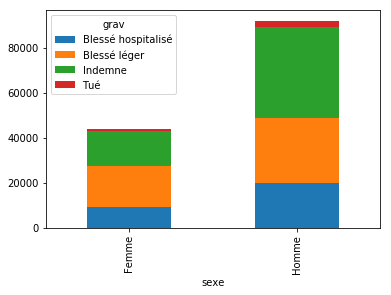

In [90]:
_.plot(kind='bar', stacked=True)

## Pour obtenir les données de localisation des accidents, faites un merge entre usagers2017 cataracteristic2017

Notez que l'on veut uniquement les données des accidents présents dans les 2 tables

In [98]:
df = caracteristiques2017.merge(usagers2017, how="inner")
df

,Num_Acc,an,mois,jour,hrmn,lum,agg,int,atm,col,...,catu,grav,sexe,trajet,secu,locp,actp,etatp,an_nais,num_veh
0,201700000001,17,1,11,1820,5,2,1,1.0,1.0,...,Conducteur,Blessé hospitalisé,Homme,9.0,13.0,0.0,0.0,0.0,1968.0,B01
1,201700000001,17,1,11,1820,5,2,1,1.0,1.0,...,Passager,Blessé hospitalisé,Femme,9.0,11.0,0.0,0.0,0.0,1973.0,B01
2,201700000001,17,1,11,1820,5,2,1,1.0,1.0,...,Conducteur,Blessé hospitalisé,Homme,1.0,13.0,0.0,0.0,0.0,1967.0,A01
3,201700000002,17,2,13,1630,1,2,3,1.0,3.0,...,Conducteur,Indemne,Homme,0.0,11.0,0.0,0.0,0.0,1953.0,A01
4,201700000002,17,2,13,1630,1,2,3,1.0,3.0,...,Conducteur,Blessé hospitalisé,Homme,5.0,22.0,0.0,0.0,0.0,1960.0,B01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136016,201700060699,17,11,26,1745,2,2,1,1.0,3.0,...,Conducteur,Indemne,Femme,9.0,11.0,0.0,0.0,0.0,1974.0,B01
136017,201700060700,17,11,28,1405,1,2,1,1.0,3.0,...,Conducteur,Indemne,Femme,9.0,11.0,0.0,0.0,0.0,1987.0,A01
136018,201700060700,17,11,28,1405,1,2,1,1.0,3.0,...,Conducteur,Blessé léger,Homme,9.0,21.0,0.0,0.0,0.0,1991.0,B01
136019,201700060700,17,11,28,1405,1,2,1,1.0,3.0,...,Passager,Blessé léger,Femme,9.0,21.0,0.0,0.0,0.0,1990.0,B01


## Y a t'il autant d'accidents dans la table une fois mergée que dans chacune des tables qui ont été mergées ? Montrez que quelque soit le type de merge on retrouve bien les mêmes résultats

`DataFrame.equals(other)`

> This function allows two Series or DataFrames to be compared against each other to see if they have the same shape and elements

In [102]:
df_left = caracteristiques2017.merge(usagers2017, how="left")
df_left.equals(df)

True

In [103]:
df_outer = caracteristiques2017.merge(usagers2017, how="outer")
df_outer.equals(df)

True

In [104]:
df_right = caracteristiques2017.merge(usagers2017, how="right")
df_right.equals(df)

True

## comptez les valeurs manquantes dans chaque colonne

In [137]:
serie = df.isnull().sum(axis=0)
serie

Num_Acc        0
an             0
mois           0
jour           0
hrmn           0
lum            0
agg            0
int            0
atm           24
col           11
com            0
adr         1967
gps        10198
lat        18028
long       18028
dep            0
place      11802
catu           0
grav           0
sexe           0
trajet        11
secu        8950
locp          46
actp          43
etatp         66
an_nais       37
num_veh        0
dtype: int64

## filtrez uniquement le résultat sur les colonnes ayant >0 valeurs manquantes et triez par ordre décroissant des valeurs

In [143]:
serie[serie>0].sort_values(ascending=False)

long       18028
lat        18028
place      11802
gps        10198
secu        8950
adr         1967
etatp         66
locp          46
actp          43
an_nais       37
atm           24
trajet        11
col           11
dtype: int64

## comptez 'la proportion' des valeurs manquantes en pourcents du nombre de valeurs totales de chaque colonne

In [153]:
serie = df.isnull().sum(axis=0) / len(df) * 100
serie.sort_values(ascending=False)

lat        13.253836
long       13.253836
place       8.676601
gps         7.497372
secu        6.579866
adr         1.446100
etatp       0.048522
locp        0.033818
actp        0.031613
an_nais     0.027202
atm         0.017644
trajet      0.008087
col         0.008087
hrmn        0.000000
agg         0.000000
mois        0.000000
an          0.000000
lum         0.000000
jour        0.000000
num_veh     0.000000
int         0.000000
com         0.000000
dep         0.000000
catu        0.000000
grav        0.000000
sexe        0.000000
Num_Acc     0.000000
dtype: float64

## Sélectionnez les accidents qui ont eu lieu dans le département de Paris (75) et les montrez

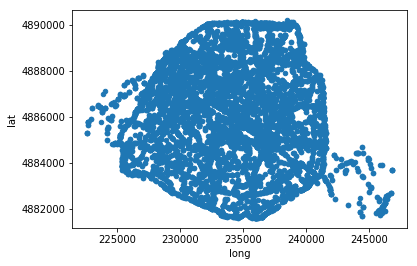

In [105]:
df[df['dep'] == 750].plot(kind='scatter', x='long', y='lat')

## Toujours sur le département Parisien, montrez la carte des accidents par gravité

grav
Blessé hospitalisé    AxesSubplot(0.125,0.125;0.775x0.755)
Blessé léger          AxesSubplot(0.125,0.125;0.775x0.755)
Indemne               AxesSubplot(0.125,0.125;0.775x0.755)
Tué                   AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

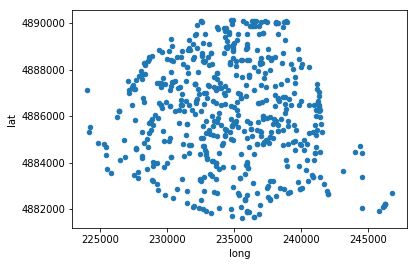

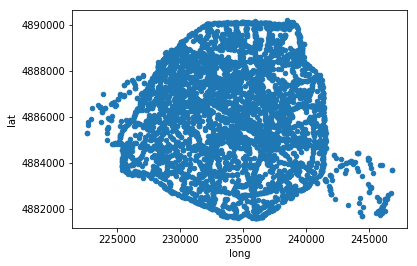

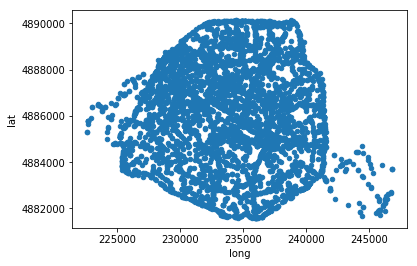

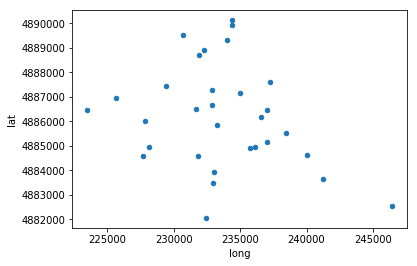

In [106]:
df[df['dep'] == 750].groupby(['grav']).plot(kind='scatter', x='long', y='lat')

In [112]:
import matplotlib.pyplot as plt

In [116]:
beautiful_colors = ["#095231", "#a8d7b7",
                    "#c0cefb", "#78b849", 
                    "#6bcd67", "#4b05c2", 
                    "#798ce8", "#7da82f"]

In [214]:
dep_parisien = df['dep'] == 750

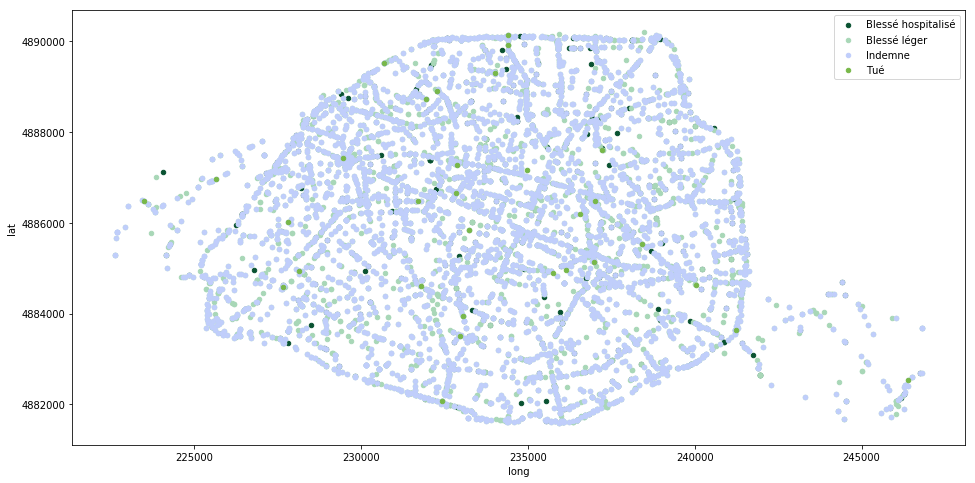

In [250]:
# create a new figure with only one ax (subplot)
fig, ax = plt.subplots(figsize=(16,8), nrows=1, ncols=1)

for (name, group), color in zip(df[dep_parisien].groupby(['grav']), beautiful_colors):
    
    # display on the same ax
    group.plot(kind='scatter',
               x='long', 
               y='lat', 
               label=name, 
               color=color,
               ax=ax)

plt.legend(loc='best')

## Faire un affichage graphique des missing values dans la table mergée

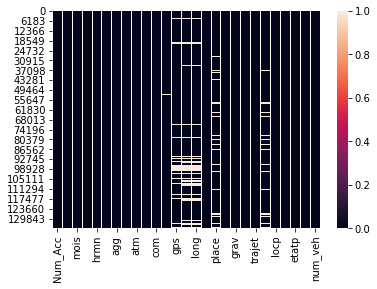

In [127]:
import seaborn as sns
sns.heatmap(df.isnull())

# Jouer avec les dates

## Renommez les colonnes:
* 'jour' en 'day'
* 'mois' en 'month'
* 'an' en 'year'

In [161]:
df.rename(columns={'an':'year',
                  'mois':'month',
                  'jour':'day'}, inplace=True)

## rajoutez '20' à chaque élément de année pour avoir un format compréhensible par pd.to_datetime (ex: 2017)

In [173]:
df['year'] = 20 *100 + df.year

## Créez une colonne date qui contient les données au format datetime

In [185]:
df.insert(1, "date", pd.to_datetime( df[["year", "month", "day"]]))
df.head(3)

,Num_Acc,date,year,month,day,hrmn,lum,agg,int,atm,...,catu,grav,sexe,trajet,secu,locp,actp,etatp,an_nais,num_veh
0,201700000001,2017-01-11,2017,1,11,1820,5,2,1,1.0,...,Conducteur,Blessé hospitalisé,Homme,9.0,13.0,0.0,0.0,0.0,1968.0,B01
1,201700000001,2017-01-11,2017,1,11,1820,5,2,1,1.0,...,Passager,Blessé hospitalisé,Femme,9.0,11.0,0.0,0.0,0.0,1973.0,B01
2,201700000001,2017-01-11,2017,1,11,1820,5,2,1,1.0,...,Conducteur,Blessé hospitalisé,Homme,1.0,13.0,0.0,0.0,0.0,1967.0,A01


In [189]:
df.dtypes['date']

dtype('<M8[ns]')

## Afficher l'évolution du nombre de morts par jours pendant l'année

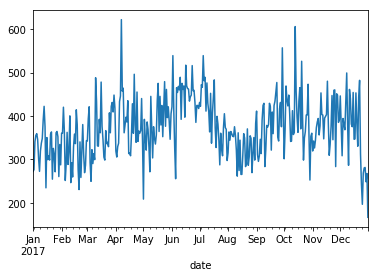

In [252]:
## Solution 1
df.groupby('date')['Num_Acc'].count().plot(kind='line')

In [ ]:
# Mieux
df.set_index("date", inplace=True)

In [254]:
df.index

DatetimeIndex(['2017-01-11', '2017-01-11', '2017-01-11', '2017-02-13',
               '2017-02-13', '2017-03-07', '2017-03-07', '2017-03-07',
               '2017-03-07', '2017-04-22',
               ...
               '2017-11-14', '2017-11-19', '2017-11-19', '2017-11-25',
               '2017-11-26', '2017-11-26', '2017-11-28', '2017-11-28',
               '2017-11-28', '2017-11-30'],
              dtype='datetime64[ns]', name='date', length=136021, freq=None)

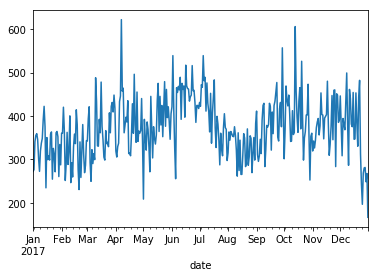

In [255]:
df.resample('D')['Num_Acc'].count().plot(kind='line')

Text(0.5, 1.0, "Nombre d'accidents journaliers pendant l'année 2017 sur la région Parisienne")

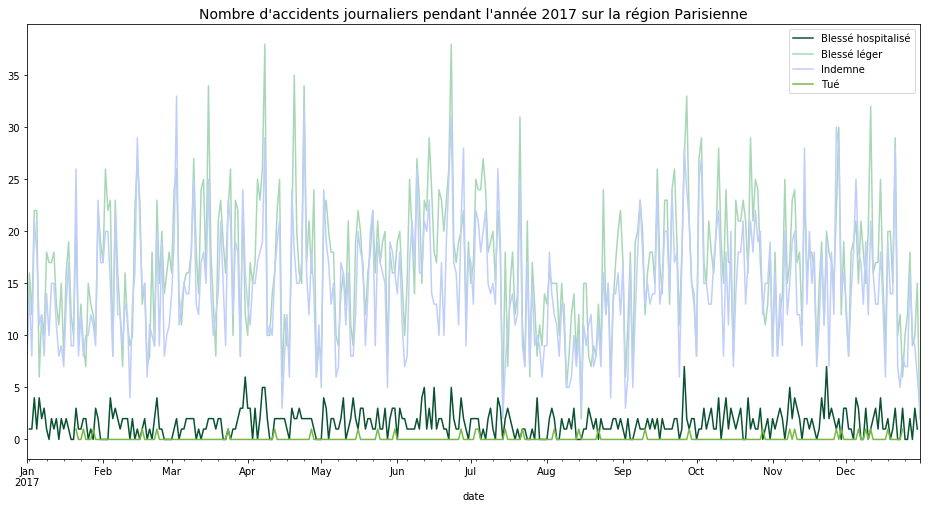

In [260]:
# create a new figure with only one ax (subplot)
fig, ax = plt.subplots(figsize=(16,8), nrows=1, ncols=1)

for (name, group), color in zip(df[dep_parisien].groupby(['grav']), beautiful_colors):
    # display on the same ax
    (   group.resample('D')['Num_Acc']
             .count()
             .plot(kind='line',
                   ax=ax,
                   label=name, 
                   color=color)
    )
plt.legend(loc='best')
plt.title("Nombre d'accidents journaliers pendant l'année 2017 sur la région Parisienne", fontdict={'fontsize':14})